In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('df_radon_combined.xlsx')

In [3]:
xls.sheet_names 

['Geiger Box',
 'classRoom',
 '1',
 '2',
 '3',
 '4',
 '5',
 '7',
 '8',
 '9',
 '10',
 '11',
 '13',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '35',
 '36',
 '37',
 '39',
 '41',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50']

In [4]:
df = {}
for num in xls.sheet_names[2:]:
    df[num] = pd.read_excel(xls, num) 
    print(df[num].shape) 

(7546, 6)
(7365, 6)
(8993, 6)
(9182, 6)
(9234, 6)
(7539, 6)
(8937, 6)
(7715, 6)
(9234, 6)
(8940, 6)
(9332, 6)
(8726, 6)
(9063, 6)
(6082, 6)
(8957, 6)
(9092, 6)
(9218, 6)
(10739, 6)
(8909, 6)
(7703, 6)
(9136, 6)
(8175, 6)
(7176, 6)
(8803, 6)
(9101, 6)
(8957, 6)
(8964, 6)
(9058, 6)
(9050, 6)
(6916, 6)
(9001, 6)
(9035, 6)
(8106, 6)
(8999, 6)
(1579, 6)
(9320, 6)
(9101, 6)
(7524, 6)
(9098, 6)
(8960, 6)


In [5]:
#remove these indexes
devices = ['1', '2', '5', '9', '17', '23', '27', '28', '36', '44', '48']
for key in list(df):
    if key in devices:
        del df[key]

In [6]:
for key in df:
    print(key)
    print(df[key].shape)
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    print(f"{df[key]['SyncDate'].min()} - {df[key]['SyncDate'].max()}")
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction='both')
    start_time = pd.to_datetime('2022-05-11T18:29:00.000000000')
    end_time = pd.to_datetime('2023-06-06T12:00:00.000000000')
    df[key] = df[key][(df[key].index >= start_time) & (df[key].index <= end_time)]
    print(f"{df[key].index.min()} - {df[key].index.max()}")

3
(8993, 6)
2022-05-08 00:16:30 - 2023-06-06 12:25:38
2022-05-11 19:00:00 - 2023-06-06 12:00:00
4
(9182, 6)
2022-05-08 00:17:23 - 2023-06-06 12:26:06
2022-05-11 19:00:00 - 2023-06-06 12:00:00
7
(7539, 6)
2022-04-01 10:18:57 - 2023-06-06 12:30:25
2022-05-11 19:00:00 - 2023-06-06 12:00:00
8
(8937, 6)
2022-04-04 18:52:46 - 2023-06-06 12:27:12
2022-05-11 19:00:00 - 2023-06-06 12:00:00
10
(9234, 6)
2022-05-08 00:56:00 - 2023-06-06 23:02:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
11
(8940, 6)
2022-05-08 00:50:01 - 2023-06-07 12:13:32
2022-05-11 19:00:00 - 2023-06-06 12:00:00
13
(9332, 6)
2022-05-08 00:33:33 - 2023-06-06 23:09:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
15
(8726, 6)
2022-05-08 00:39:00 - 2023-06-06 23:59:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
16
(9063, 6)
2022-05-08 00:47:00 - 2023-06-06 23:00:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
18
(8957, 6)
2022-05-08 00:49:00 - 2023-06-06 23:07:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
19
(9092, 6)
2022-05-08 00:51:00 -

In [7]:
 df_radon = pd.DataFrame(index=df['50'].index)

In [8]:
for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

3
4
7
8
10
11
13
15
16
18
19
20
21
22
25
26
29
30
31
32
35
37
39
41
43
45
46
49
50


/home/ubuntu/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column: Radon_3
Shapiro-Wilk Test - Statistic 0.6641197800636292
Shaipro-Wilk Test - p-value 0.0


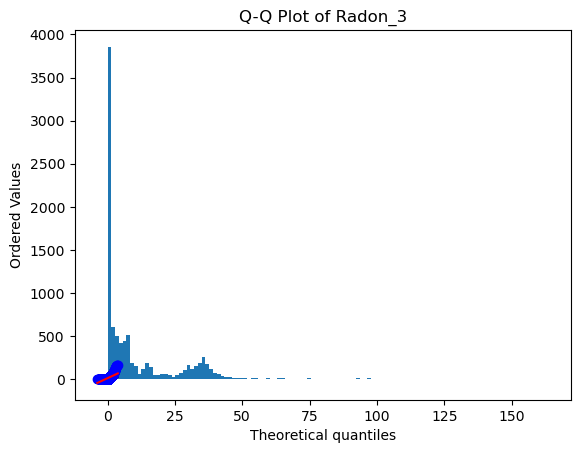

Column: Radon_4
Shapiro-Wilk Test - Statistic 0.7563549280166626
Shaipro-Wilk Test - p-value 0.0


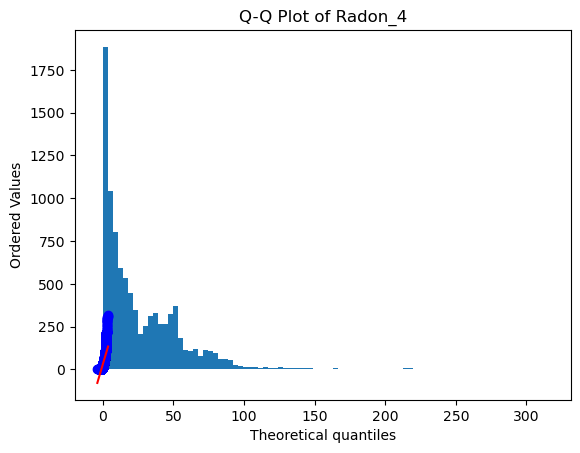

Column: Radon_7
Shapiro-Wilk Test - Statistic 0.40425920486450195
Shaipro-Wilk Test - p-value 0.0


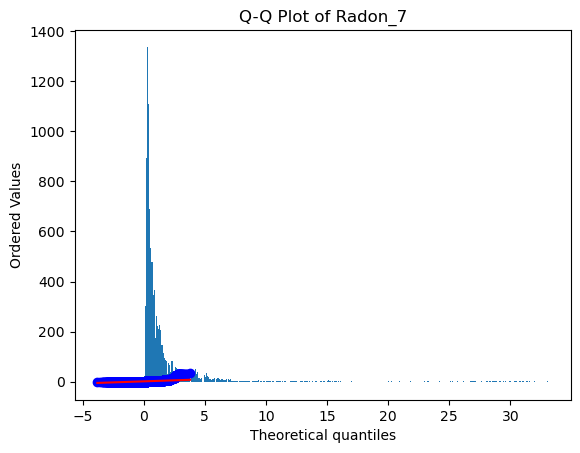

Column: Radon_8
Shapiro-Wilk Test - Statistic 0.8337163329124451
Shaipro-Wilk Test - p-value 0.0


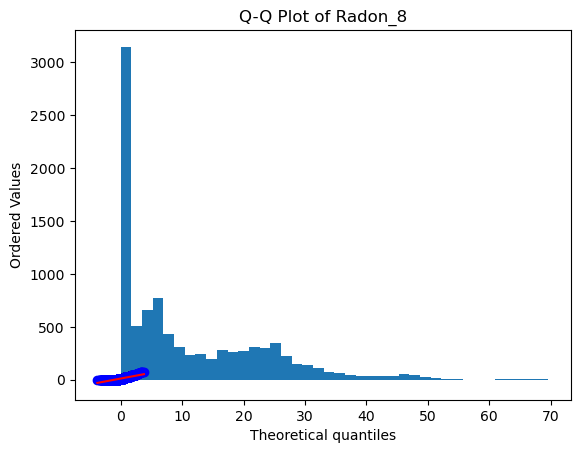

Column: Radon_10
Shapiro-Wilk Test - Statistic 0.8305805921554565
Shaipro-Wilk Test - p-value 0.0


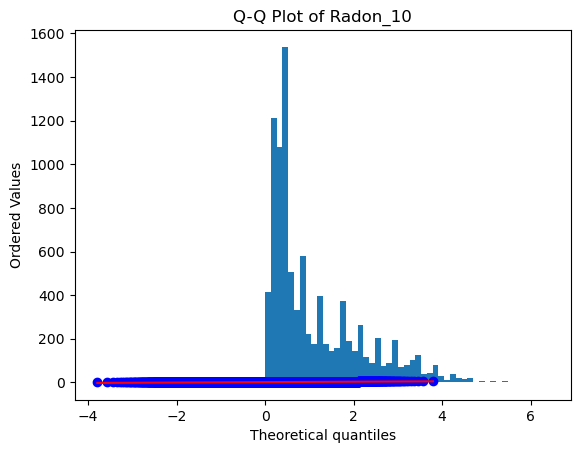

Column: Radon_11
Shapiro-Wilk Test - Statistic 0.7761942148208618
Shaipro-Wilk Test - p-value 0.0


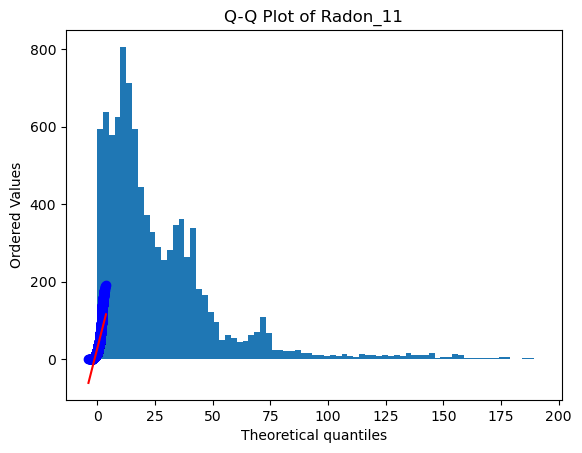

Column: Radon_13
Shapiro-Wilk Test - Statistic 0.6351435780525208
Shaipro-Wilk Test - p-value 0.0


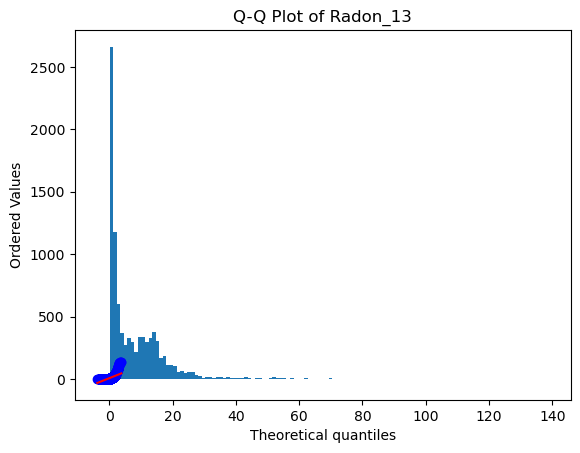

Column: Radon_15
Shapiro-Wilk Test - Statistic 0.8357134461402893
Shaipro-Wilk Test - p-value 0.0


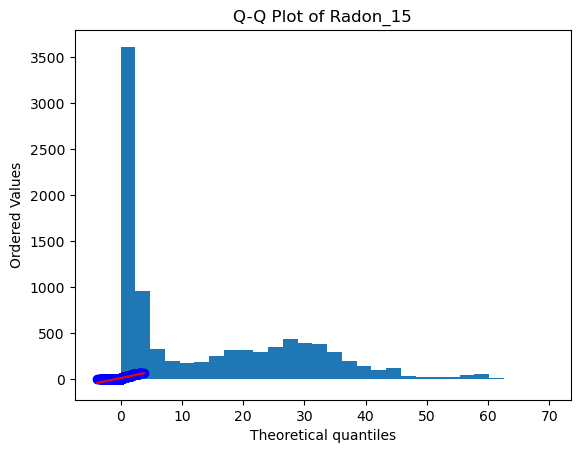

Column: Radon_16
Shapiro-Wilk Test - Statistic 0.7398327589035034
Shaipro-Wilk Test - p-value 0.0


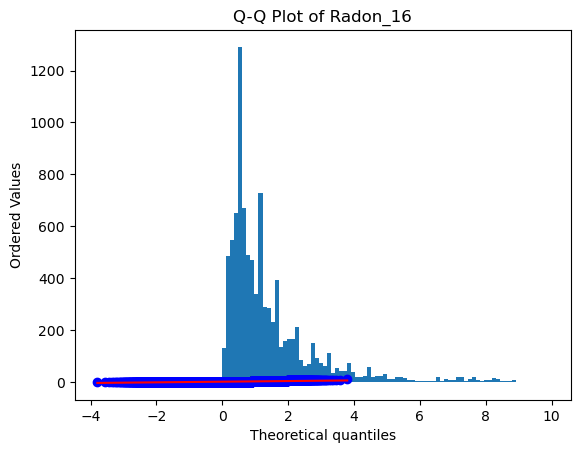

Column: Radon_18
Shapiro-Wilk Test - Statistic 0.7042157053947449
Shaipro-Wilk Test - p-value 0.0


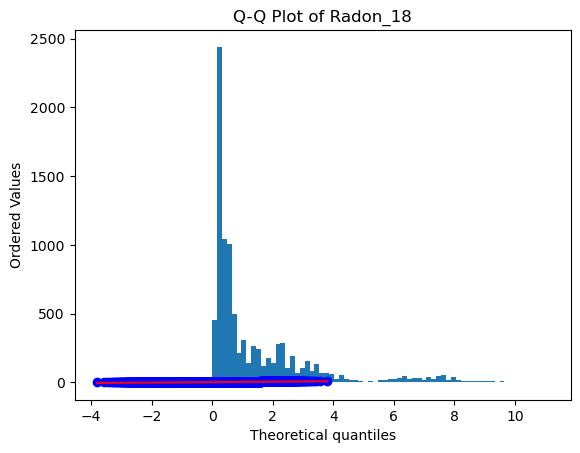

Column: Radon_19
Shapiro-Wilk Test - Statistic 0.6517846584320068
Shaipro-Wilk Test - p-value 0.0


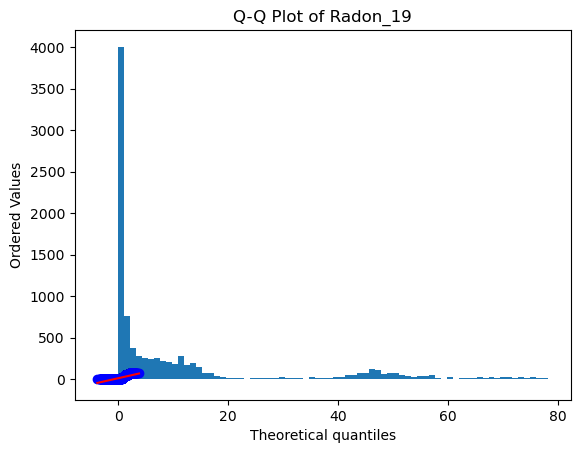

Column: Radon_20
Shapiro-Wilk Test - Statistic 0.6865960359573364
Shaipro-Wilk Test - p-value 0.0


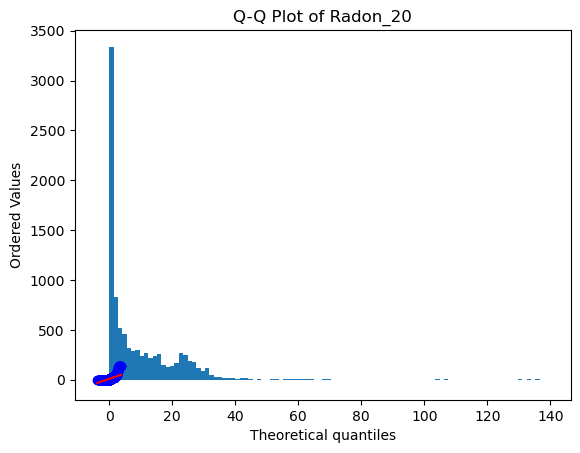

Column: Radon_21
Shapiro-Wilk Test - Statistic 0.5648850202560425
Shaipro-Wilk Test - p-value 0.0


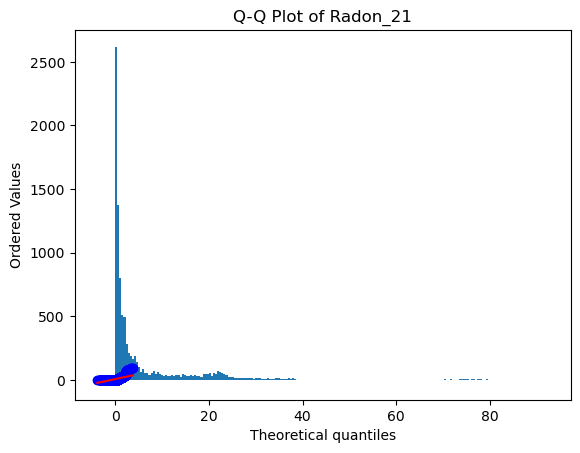

Column: Radon_22
Shapiro-Wilk Test - Statistic 0.4055997133255005
Shaipro-Wilk Test - p-value 0.0


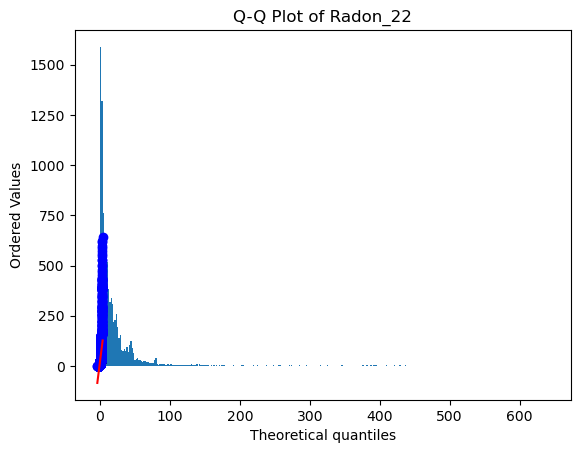

Column: Radon_25
Shapiro-Wilk Test - Statistic 0.8284599781036377
Shaipro-Wilk Test - p-value 0.0


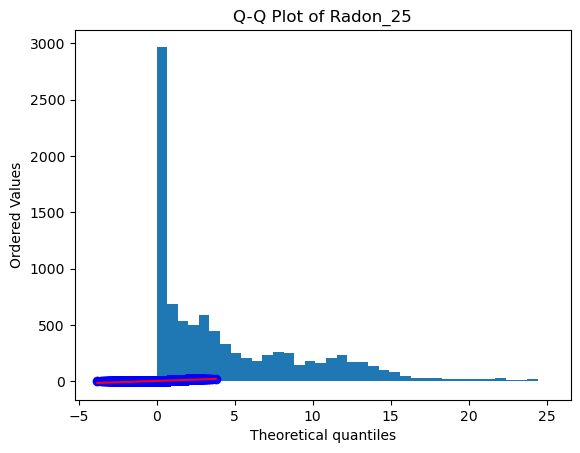

Column: Radon_26
Shapiro-Wilk Test - Statistic 0.7190394997596741
Shaipro-Wilk Test - p-value 0.0


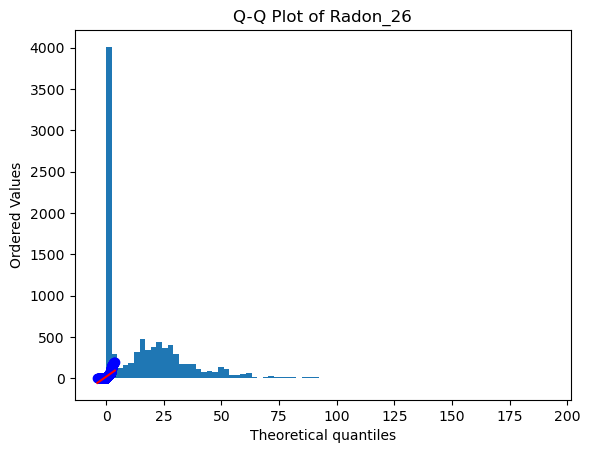

Column: Radon_29
Shapiro-Wilk Test - Statistic 0.8080685138702393
Shaipro-Wilk Test - p-value 0.0


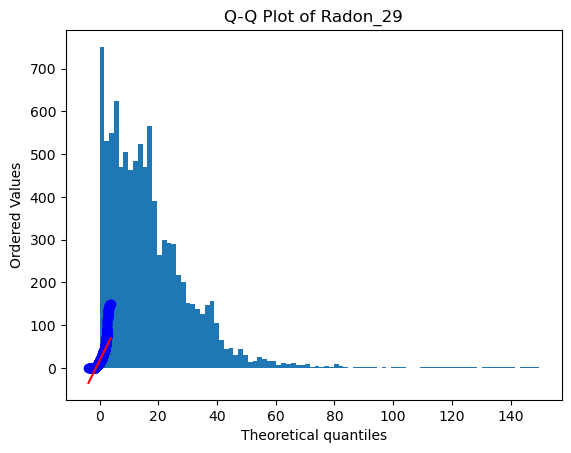

Column: Radon_30
Shapiro-Wilk Test - Statistic 0.792061984539032
Shaipro-Wilk Test - p-value 0.0


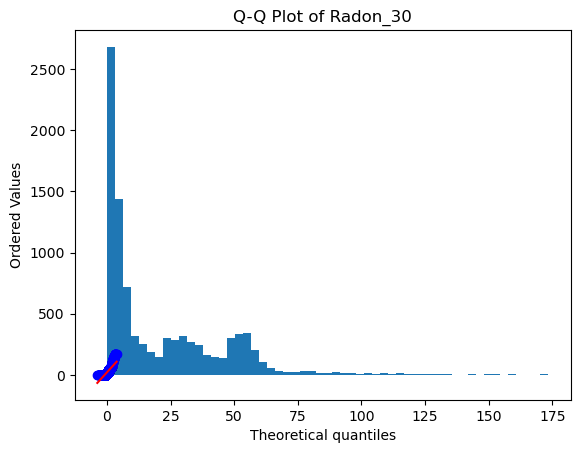

Column: Radon_31
Shapiro-Wilk Test - Statistic 0.6845229864120483
Shaipro-Wilk Test - p-value 0.0


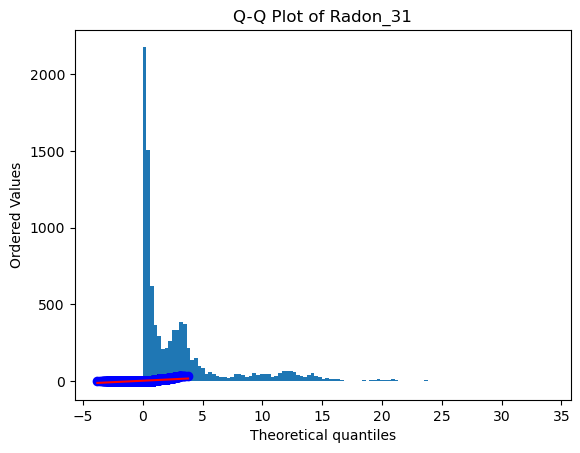

Column: Radon_32
Shapiro-Wilk Test - Statistic 0.6264092922210693
Shaipro-Wilk Test - p-value 0.0


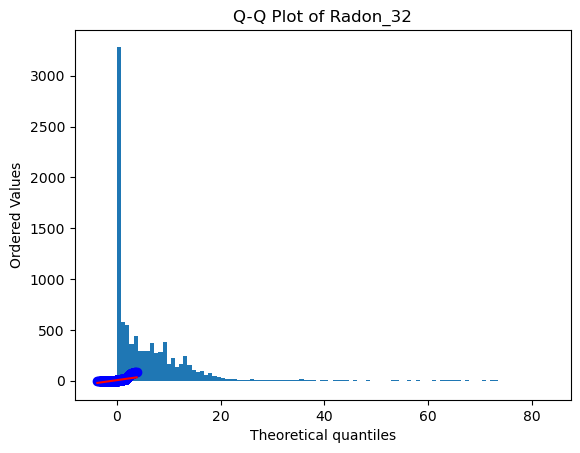

Column: Radon_35
Shapiro-Wilk Test - Statistic 0.6725183725357056
Shaipro-Wilk Test - p-value 0.0


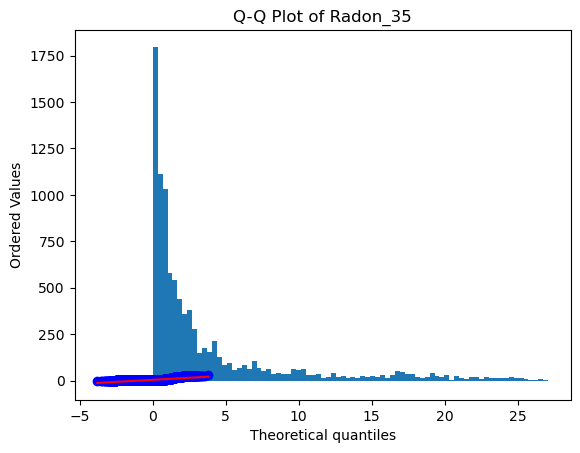

Column: Radon_37
Shapiro-Wilk Test - Statistic 0.7601339817047119
Shaipro-Wilk Test - p-value 0.0


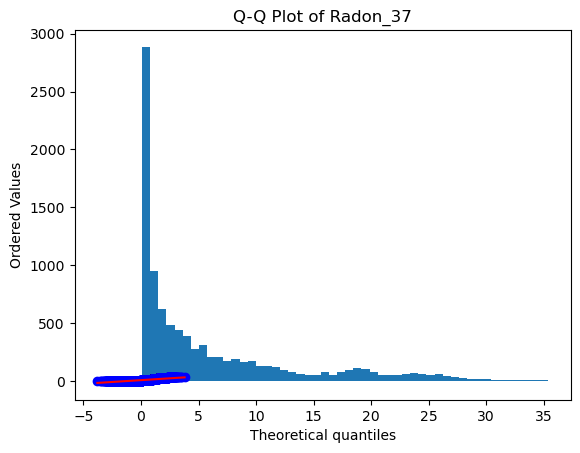

Column: Radon_39
Shapiro-Wilk Test - Statistic 0.8280836343765259
Shaipro-Wilk Test - p-value 0.0


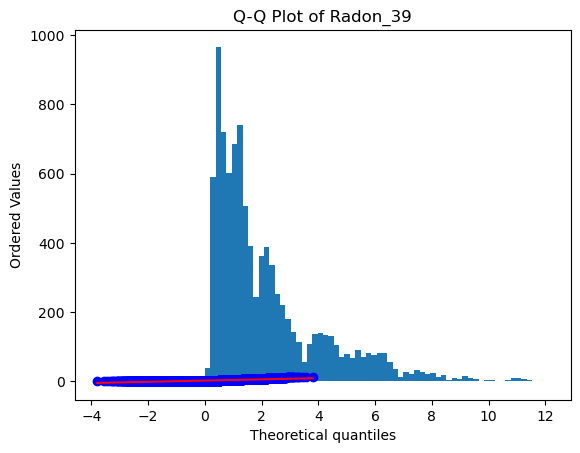

Column: Radon_41
Shapiro-Wilk Test - Statistic 0.5007452964782715
Shaipro-Wilk Test - p-value 0.0


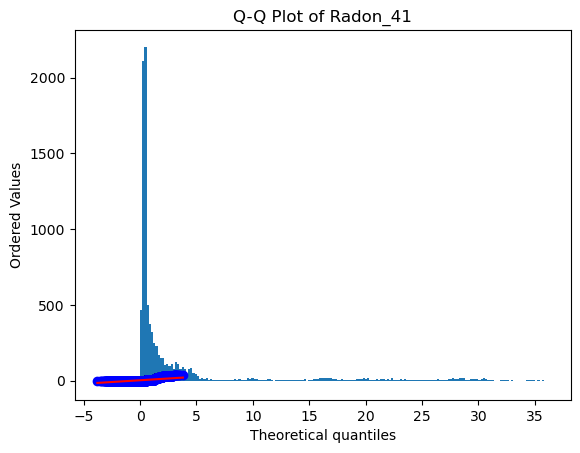

Column: Radon_43
Shapiro-Wilk Test - Statistic 0.724061131477356
Shaipro-Wilk Test - p-value 0.0


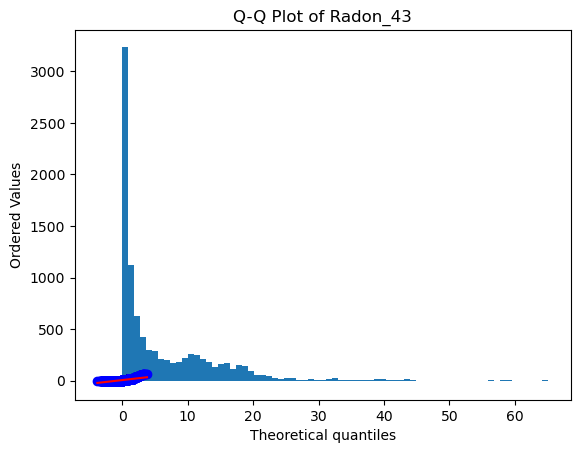

Column: Radon_45
Shapiro-Wilk Test - Statistic 0.811974287033081
Shaipro-Wilk Test - p-value 0.0


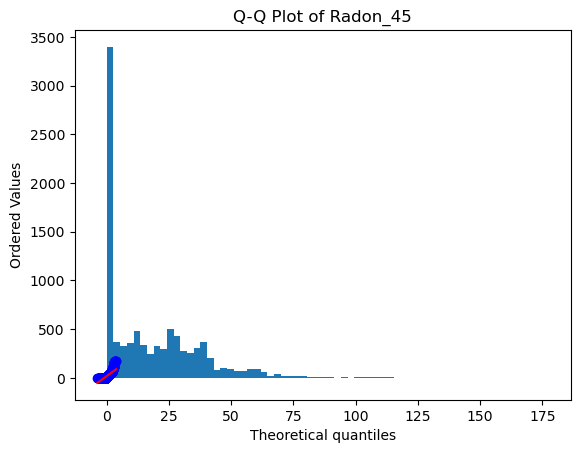

Column: Radon_46
Shapiro-Wilk Test - Statistic 0.8229840993881226
Shaipro-Wilk Test - p-value 0.0


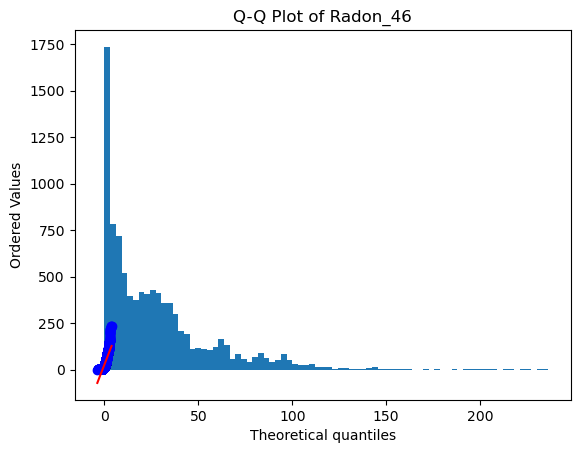

Column: Radon_49
Shapiro-Wilk Test - Statistic 0.6658380627632141
Shaipro-Wilk Test - p-value 0.0


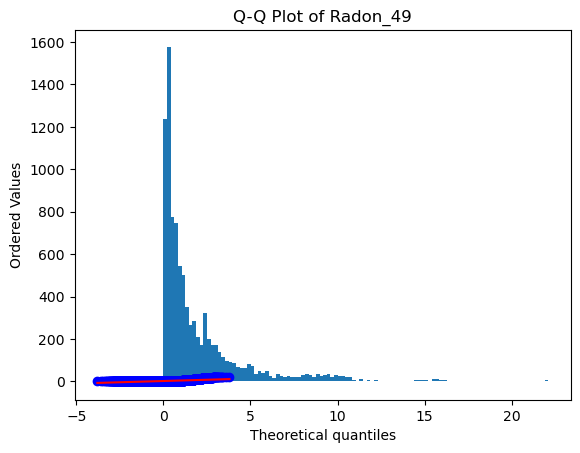

Column: Radon_50
Shapiro-Wilk Test - Statistic 0.8493155241012573
Shaipro-Wilk Test - p-value 0.0


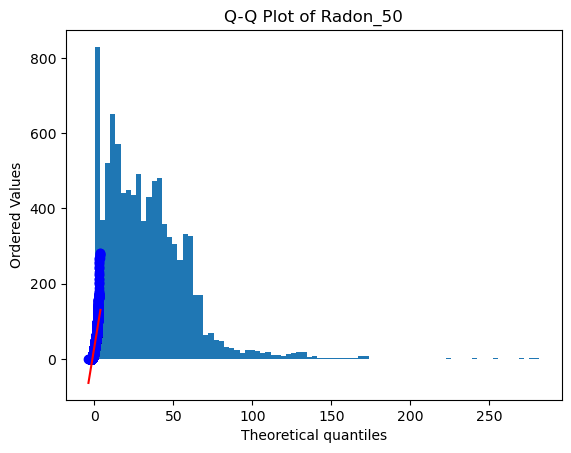

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
for column in df_radon.columns:
    data = df_radon[column]
    
    statistic, p_value = stats.shapiro(data)
    
    print("Column:", column)
    print("Shapiro-Wilk Test - Statistic", statistic)
    print("Shaipro-Wilk Test - p-value", p_value)
    
    #create a historgram of the data
    plt.hist(data, bins='auto')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    
    #create a Q-Q plot
    stats.probplot(data, dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of {column}")
    plt.show()


#### Looking at the above results we can reject the null hypothesis and assume that all of the sensor values are not normally distributed in that case using pearson correlation is not a good approach.

In [10]:
df_corr = df_radon.corr(method='spearman')

In [11]:
df_corr

Radon_3   Radon_4   Radon_7   Radon_8  Radon_10  Radon_11  \
Radon_3   1.000000  0.721290  0.022669  0.711865  0.692935  0.651179   
Radon_4   0.721290  1.000000  0.358603  0.741141  0.583163  0.854990   
Radon_7   0.022669  0.358603  1.000000  0.333202  0.109028  0.326335   
Radon_8   0.711865  0.741141  0.333202  1.000000  0.778888  0.793920   
Radon_10  0.692935  0.583163  0.109028  0.778888  1.000000  0.603137   
Radon_11  0.651179  0.854990  0.326335  0.793920  0.603137  1.000000   
Radon_13  0.847892  0.765626  0.106841  0.759614  0.740735  0.751618   
Radon_15  0.720770  0.591366  0.063628  0.814066  0.788124  0.634666   
Radon_16  0.574814  0.408521  0.096359  0.659532  0.654046  0.438552   
Radon_18  0.754988  0.474837 -0.083550  0.624823  0.744998  0.486620   
Radon_19  0.658896  0.720103  0.280758  0.845271  0.787270  0.705404   
Radon_20  0.887394  0.722311  0.028824  0.758978  0.716926  0.703294   
Radon_21  0.649322  0.665371  0.240043  0.756309  0.746693  0.631372   
Radon_22  0.543300  0.631731  0.215679  0.428164  0.379585  0.602466   
Radon_25  0.750815  0.803112  0.311456  0.816775  0.761666  0.805374   
Radon_26  0.338473  0.362601  0.186701  0.454122  0.505115  0.383814   
Radon_29  0.614791  0.705307  0.269591  0.685229  0.494829  0.675395   
Radon_30  0.829785  0.851550  0.139944  0.782362  0.687949  0.826264   
Radon_31  0.587389  0.489164  0.298112  0.695551  0.685827  0.488655   
Radon_32  0.835280  0.591941 -0.012220  0.643441  0.709215  0.548769   
Radon_35  0.697002  0.525586  0.195872  0.709831  0.811267  0.532231   
Radon_37  0.836938  0.702907  0.039993  0.725779  0.739425  0.715197   
Radon_39  0.519632  0.396248  0.325162  0.645448  0.688573  0.392880   
Radon_41  0.560263  0.408268  0.140535  0.575405  0.706281  0.451924   
Radon_43  0.769112  0.629495  0.071513  0.788112  0.745871  0.652816   
Radon_45  0.863123  0.717551  0.062720  0.776279  0.781396  0.677276   
Radon_46  0.609258  0.776289  0.391228  0.632273  0.435303  0.738864   
Radon_49  0.628970  0.458444  0.103825  0.640424  0.773299  0.414571   
Radon_50  0.750865  0.669491  0.072957  0.549314  0.567579  0.611354   

          Radon_13  Radon_15  Radon_16  Radon_18  ...  Radon_32  Radon_35  \
Radon_3   0.847892  0.720770  0.574814  0.754988  ...  0.835280  0.697002   
Radon_4   0.765626  0.591366  0.408521  0.474837  ...  0.591941  0.525586   
Radon_7   0.106841  0.063628  0.096359 -0.083550  ... -0.012220  0.195872   
Radon_8   0.759614  0.814066  0.659532  0.624823  ...  0.643441  0.709831   
Radon_10  0.740735  0.788124  0.654046  0.744998  ...  0.709215  0.811267   
Radon_11  0.751618  0.634666  0.438552  0.486620  ...  0.548769  0.532231   
Radon_13  1.000000  0.781694  0.540754  0.755416  ...  0.811567  0.692137   
Radon_15  0.781694  1.000000  0.624582  0.732282  ...  0.703066  0.749902   
Radon_16  0.540754  0.624582  1.000000  0.620361  ...  0.564846  0.662472   
Radon_18  0.755416  0.732282  0.620361  1.000000  ...  0.802396  0.719528   
Radon_19  0.767929  0.836924  0.614053  0.628895  ...  0.599549  0.725622   
Radon_20  0.855756  0.738061  0.592279  0.765068  ...  0.823275  0.700396   
Radon_21  0.693381  0.713142  0.667088  0.631224  ...  0.629444  0.672355   
Radon_22  0.588143  0.407629  0.086779  0.378673  ...  0.556637  0.401292   
Radon_25  0.787550  0.753749  0.514554  0.636612  ...  0.690060  0.733811   
Radon_26  0.399033  0.508126  0.287375  0.394142  ...  0.379387  0.522255   
Radon_29  0.653560  0.543231  0.250611  0.421845  ...  0.508266  0.428452   
Radon_30  0.880109  0.733007  0.529277  0.678199  ...  0.725962  0.631996   
Radon_31  0.547077  0.699915  0.603662  0.565627  ...  0.552876  0.801857   
Radon_32  0.811567  0.703066  0.564846  0.802396  ...  1.000000  0.741857   
Radon_35  0.692137  0.749902  0.662472  0.719528  ...  0.741857  1.000000   
Radon_37  0.799206  0.713003  0.544083  0.742219  ...  0.773291  0.754038   
Radon_39  0.489023  0.588512  0.695248  0.543512  ...  0.548427  0.790348   
Ra

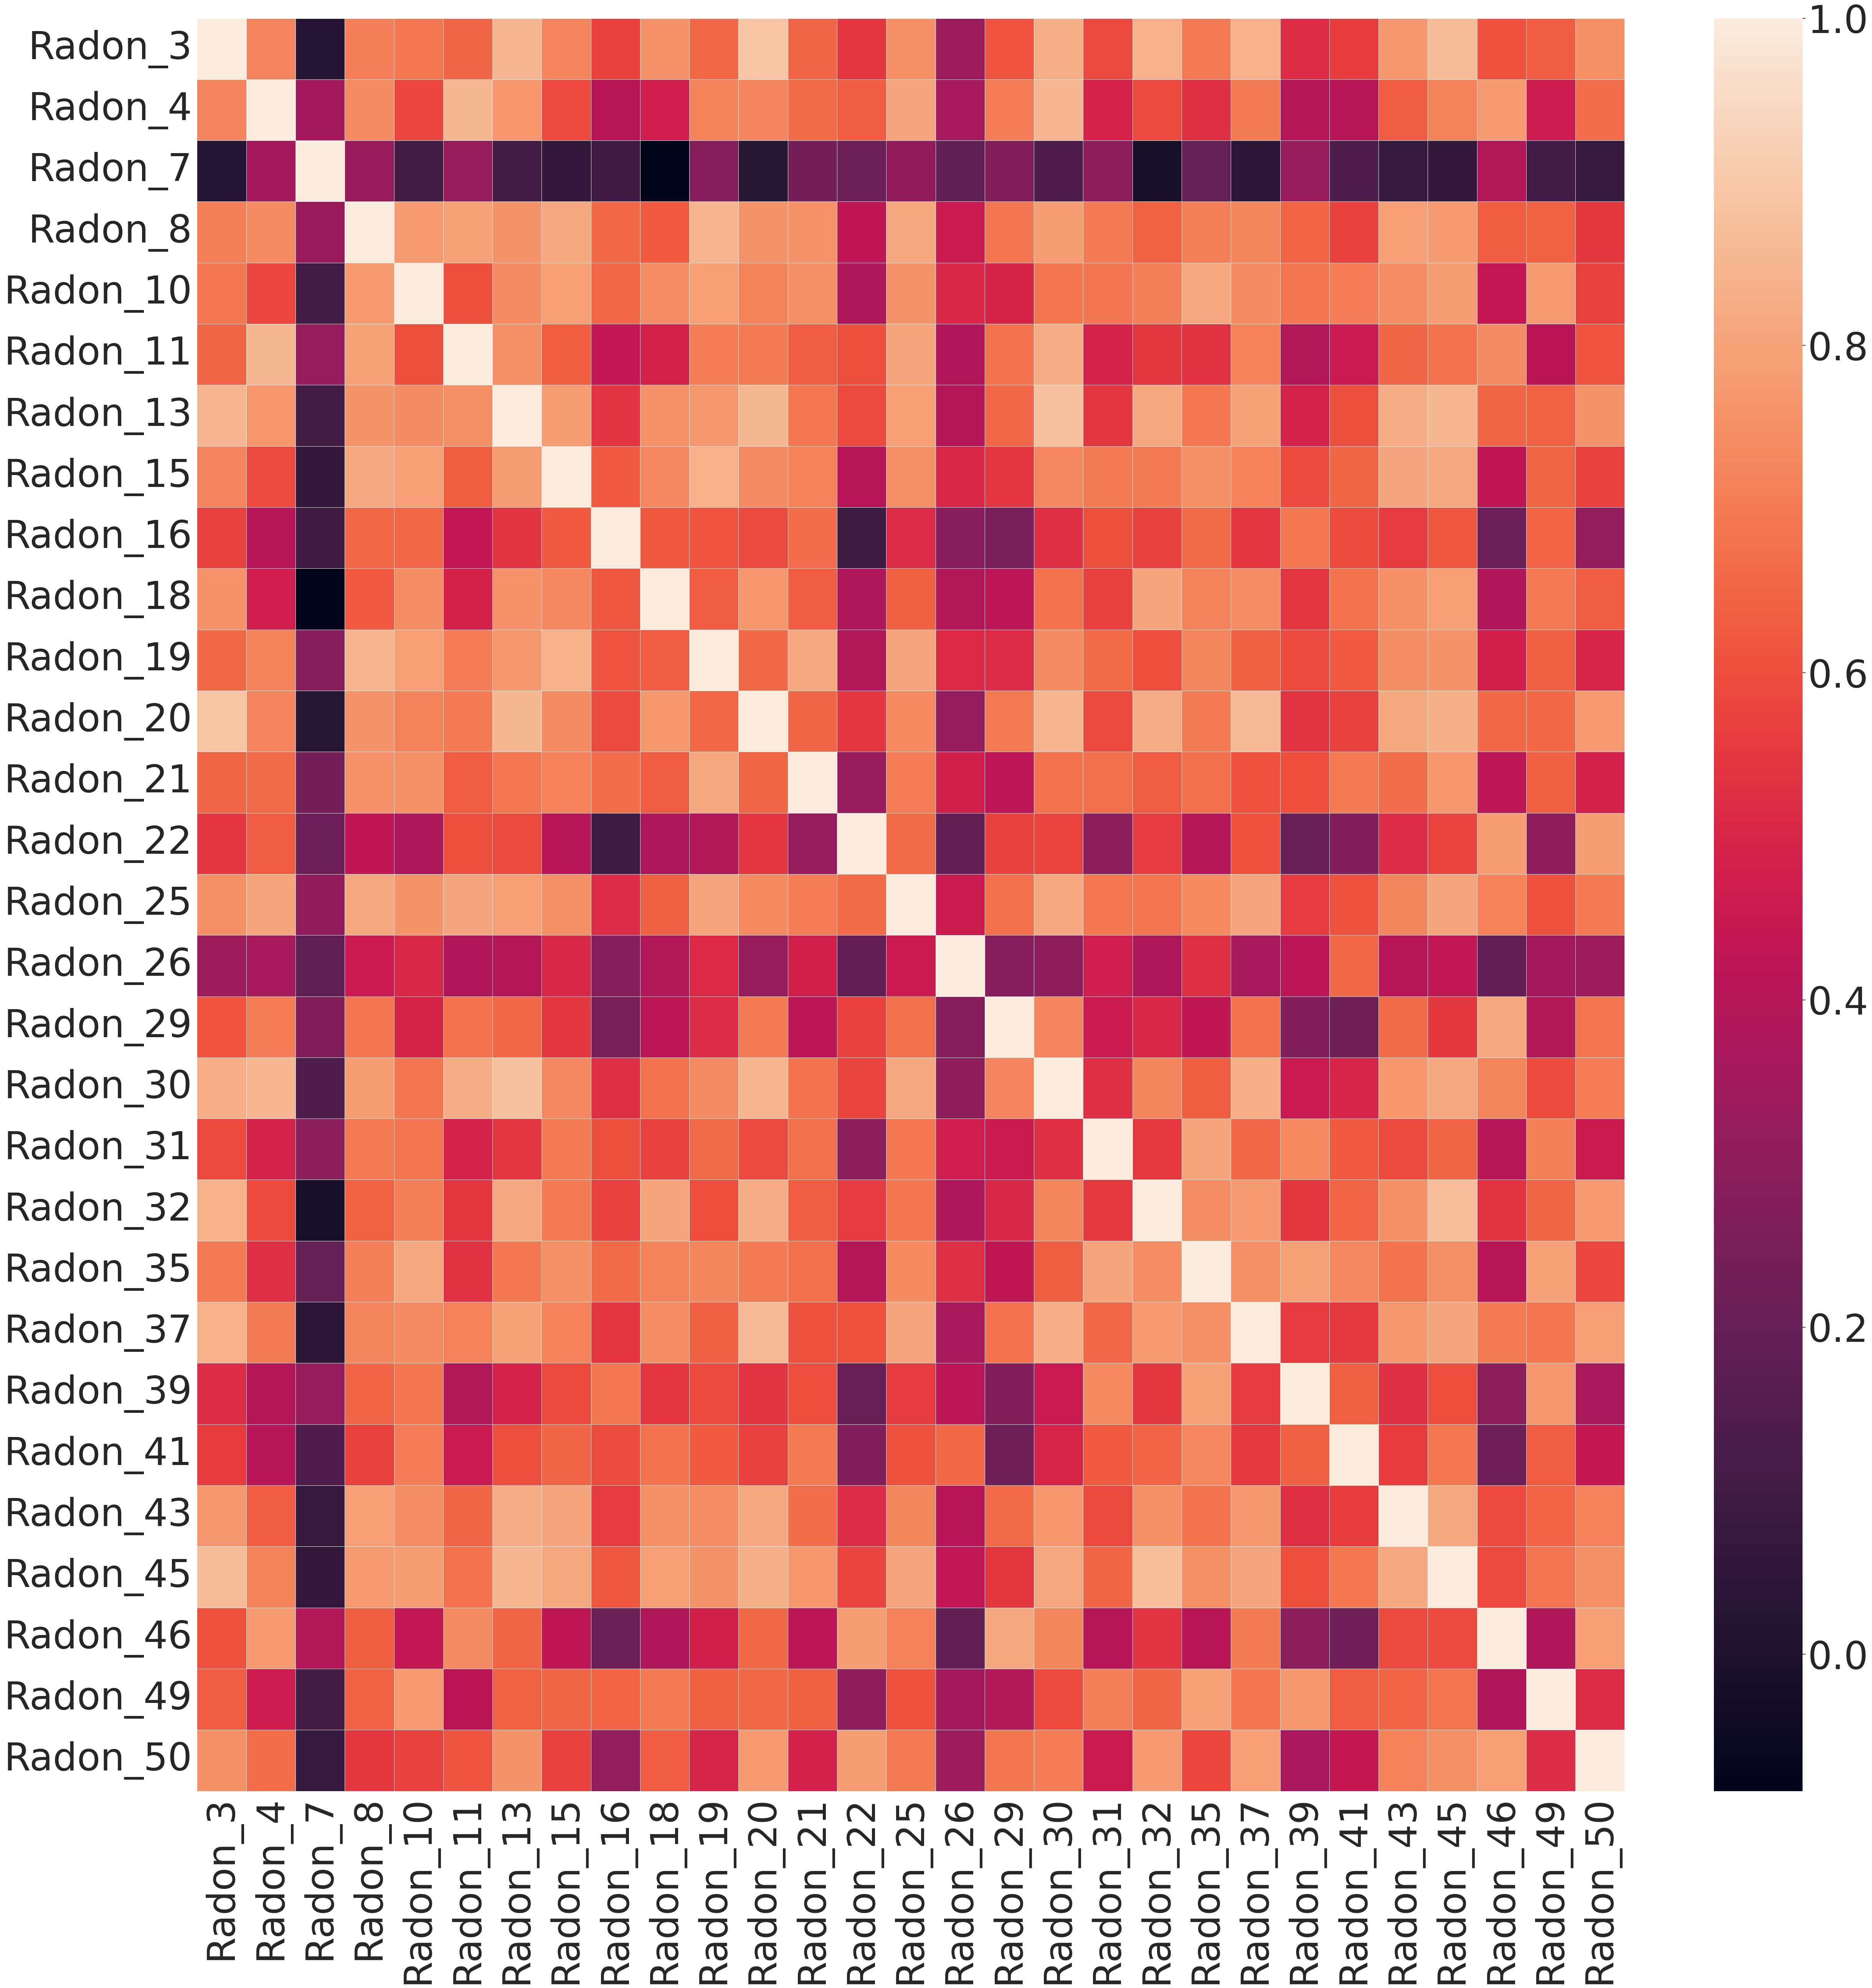

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(60,60)})
sns.set(font_scale=6.5)
sns.heatmap(df_corr, linewidths=.5, xticklabels=df_corr.index, yticklabels=df_corr.columns)
plt.xticks(rotation=90)
plt.savefig('heatmap_correlation.png', bbox_inches='tight')

In [13]:
A_adj_6 = df_corr > 0.8

In [14]:
for i in A_adj_6.columns:
    A_adj_6[i][i] = False
# for i in A_adj_7.columns:
#     A_adj_7[i][i] = False

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
g6 = nx.from_pandas_adjacency(A_adj_6)

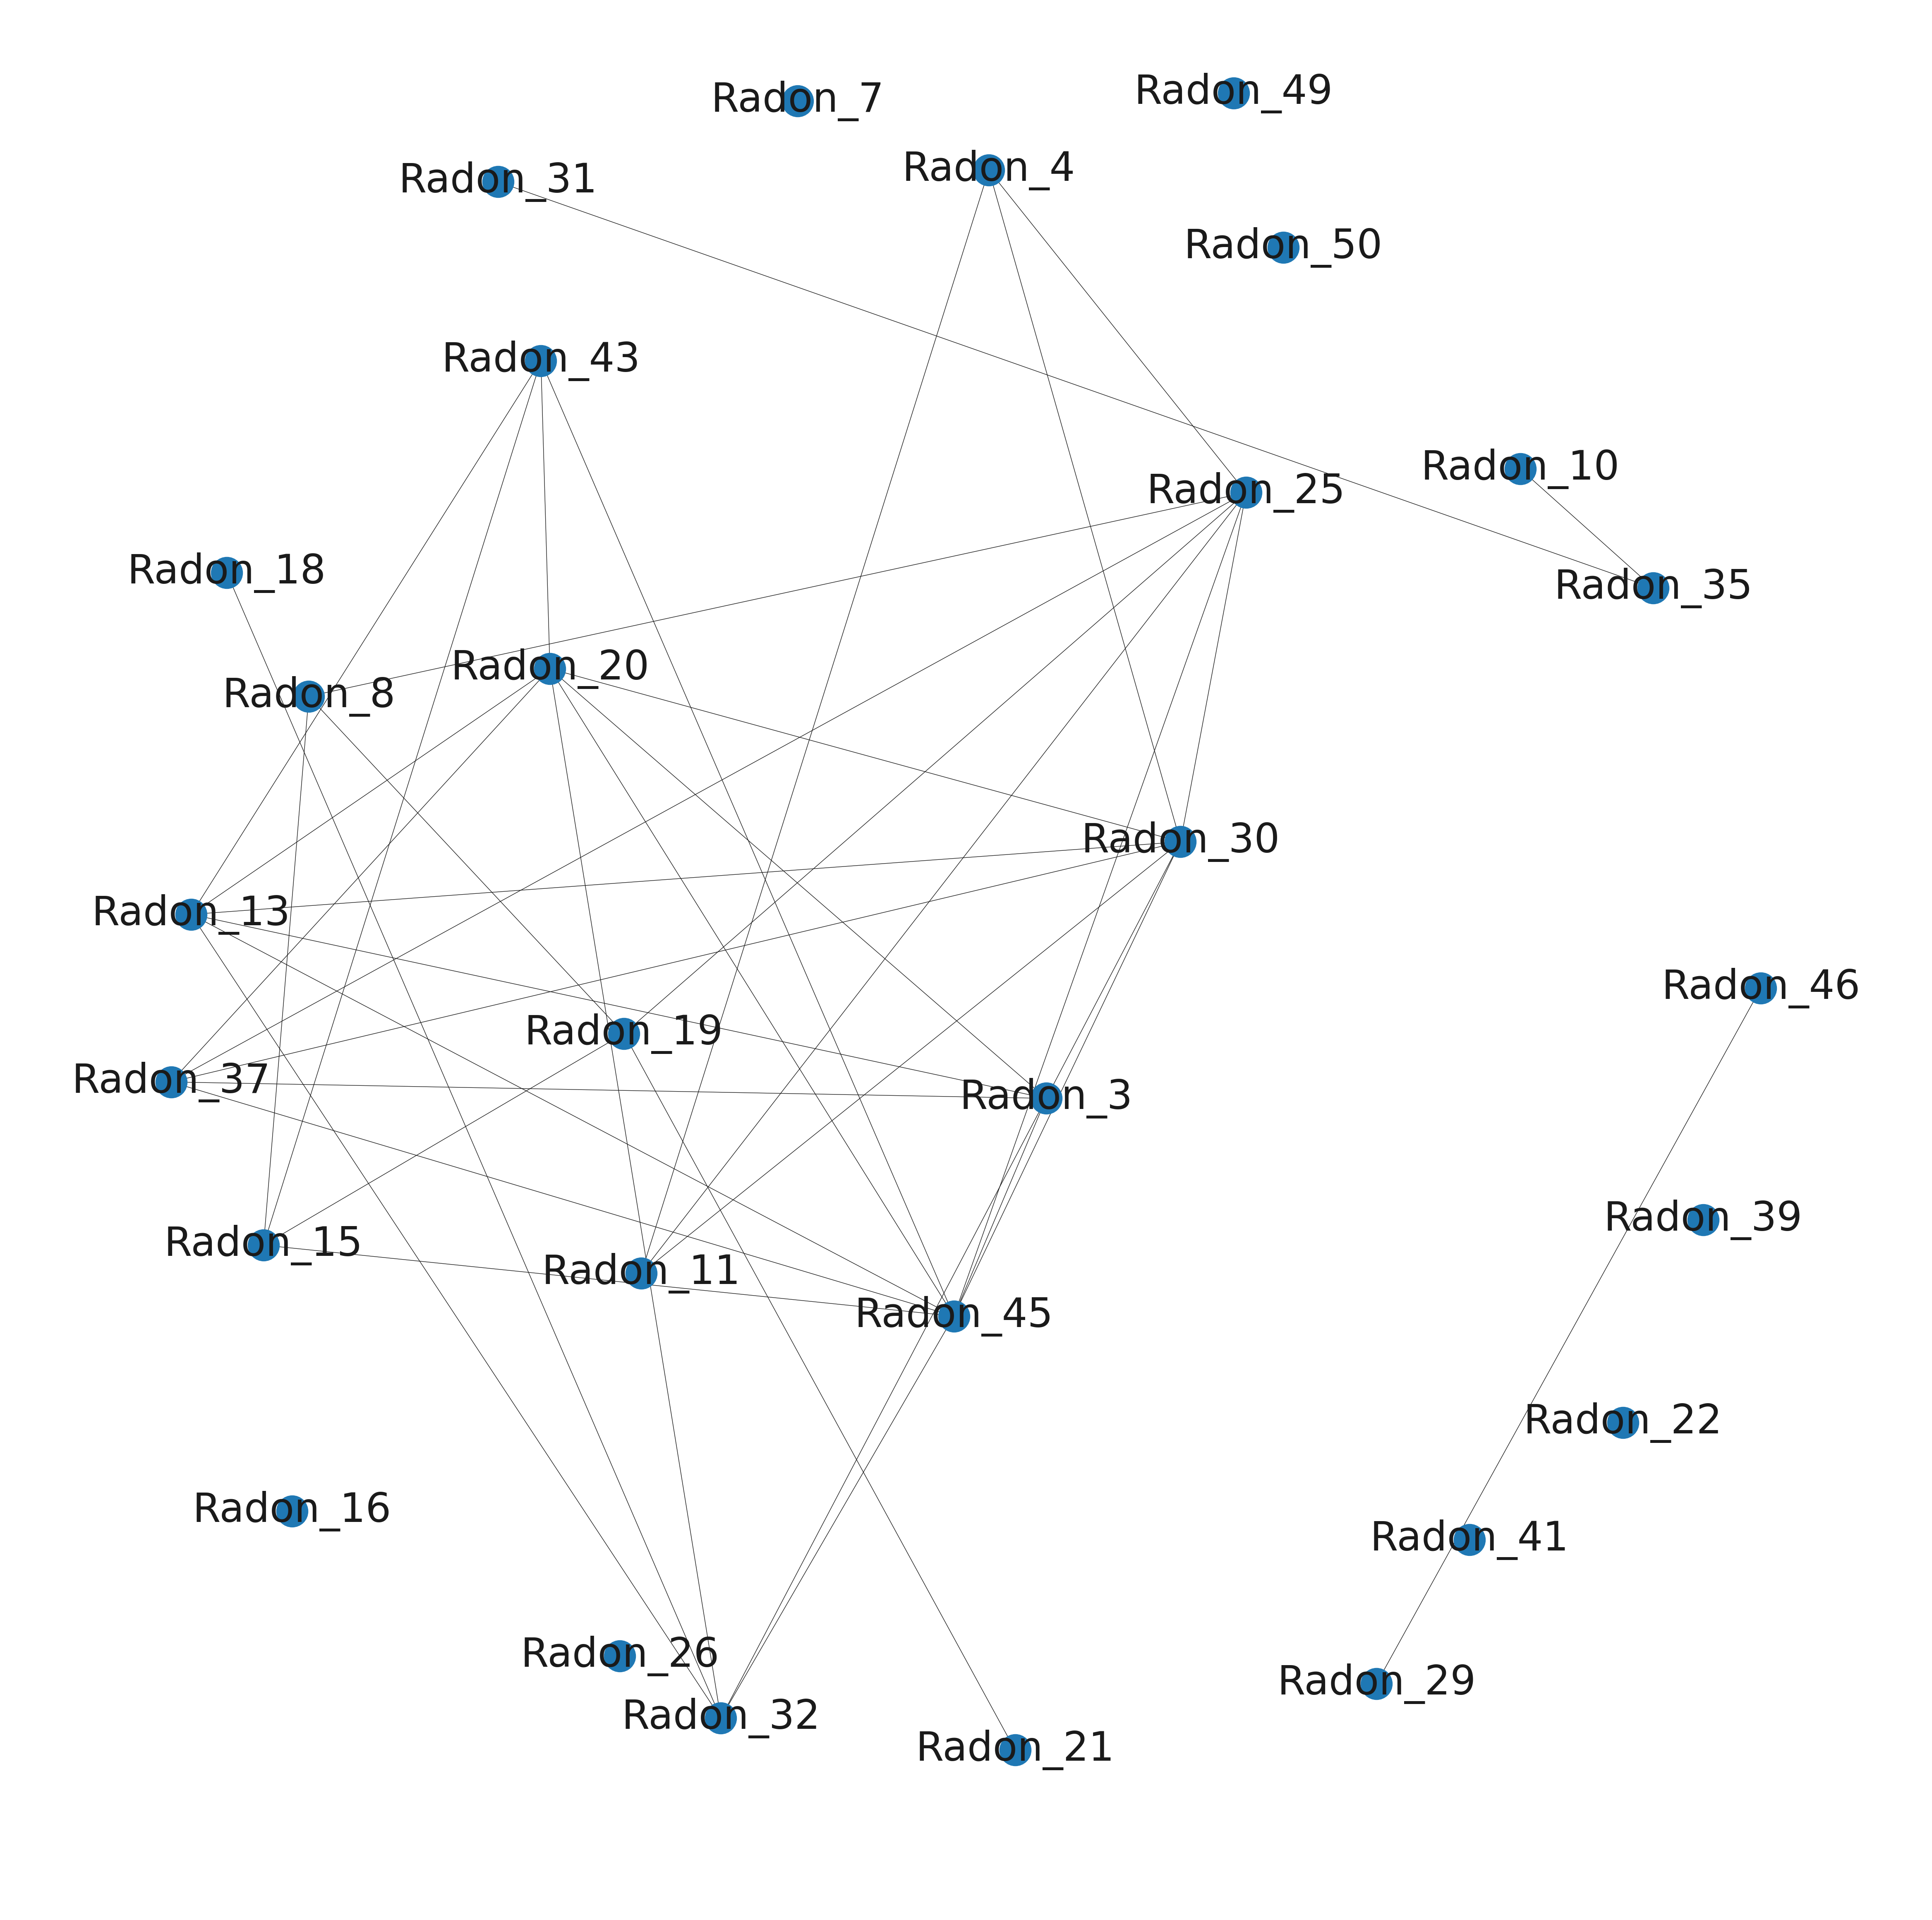

In [16]:
plt.rcParams = plt.rcParamsOrig
fig, ax2 = plt.subplots(1, 1, figsize=(60,60))
ax2.set_facecolor('white')
nx.draw_networkx(g6, font_size=70, node_size=3000, ax=ax2, width = 1, with_labels=True, pos = nx.spring_layout(g6, k=2))
fig.savefig('spatial_correlation_7', bbox_inches='tight')

In [17]:
from networkx.algorithms import community
communities_label_propagation = community.label_propagation_communities(g6)
communities_louvain = community.greedy_modularity_communities(g6)
print("--------------------------------------------------------")
for i, community in enumerate(communities_label_propagation):
    print(f"Community {i+1}: {community}")
print("----------------------------------------------------------")
for i, community in enumerate(communities_louvain):
    print(f"Community {i+1}: {community}")

--------------------------------------------------------
Community 1: {'Radon_20', 'Radon_4', 'Radon_25', 'Radon_19', 'Radon_13', 'Radon_3', 'Radon_45', 'Radon_43', 'Radon_11', 'Radon_30', 'Radon_37', 'Radon_8', 'Radon_18', 'Radon_32', 'Radon_15', 'Radon_21'}
Community 2: {'Radon_7'}
Community 3: {'Radon_35', 'Radon_31', 'Radon_10'}
Community 4: {'Radon_16'}
Community 5: {'Radon_22'}
Community 6: {'Radon_26'}
Community 7: {'Radon_29', 'Radon_46'}
Community 8: {'Radon_39'}
Community 9: {'Radon_41'}
Community 10: {'Radon_49'}
Community 11: {'Radon_50'}
----------------------------------------------------------
Community 1: frozenset({'Radon_20', 'Radon_45', 'Radon_13', 'Radon_3', 'Radon_18', 'Radon_32', 'Radon_43'})
Community 2: frozenset({'Radon_37', 'Radon_4', 'Radon_25', 'Radon_11', 'Radon_30'})
Community 3: frozenset({'Radon_21', 'Radon_8', 'Radon_15', 'Radon_19'})
Community 4: frozenset({'Radon_10', 'Radon_31', 'Radon_35'})
Community 5: frozenset({'Radon_29', 'Radon_46'})
Community 

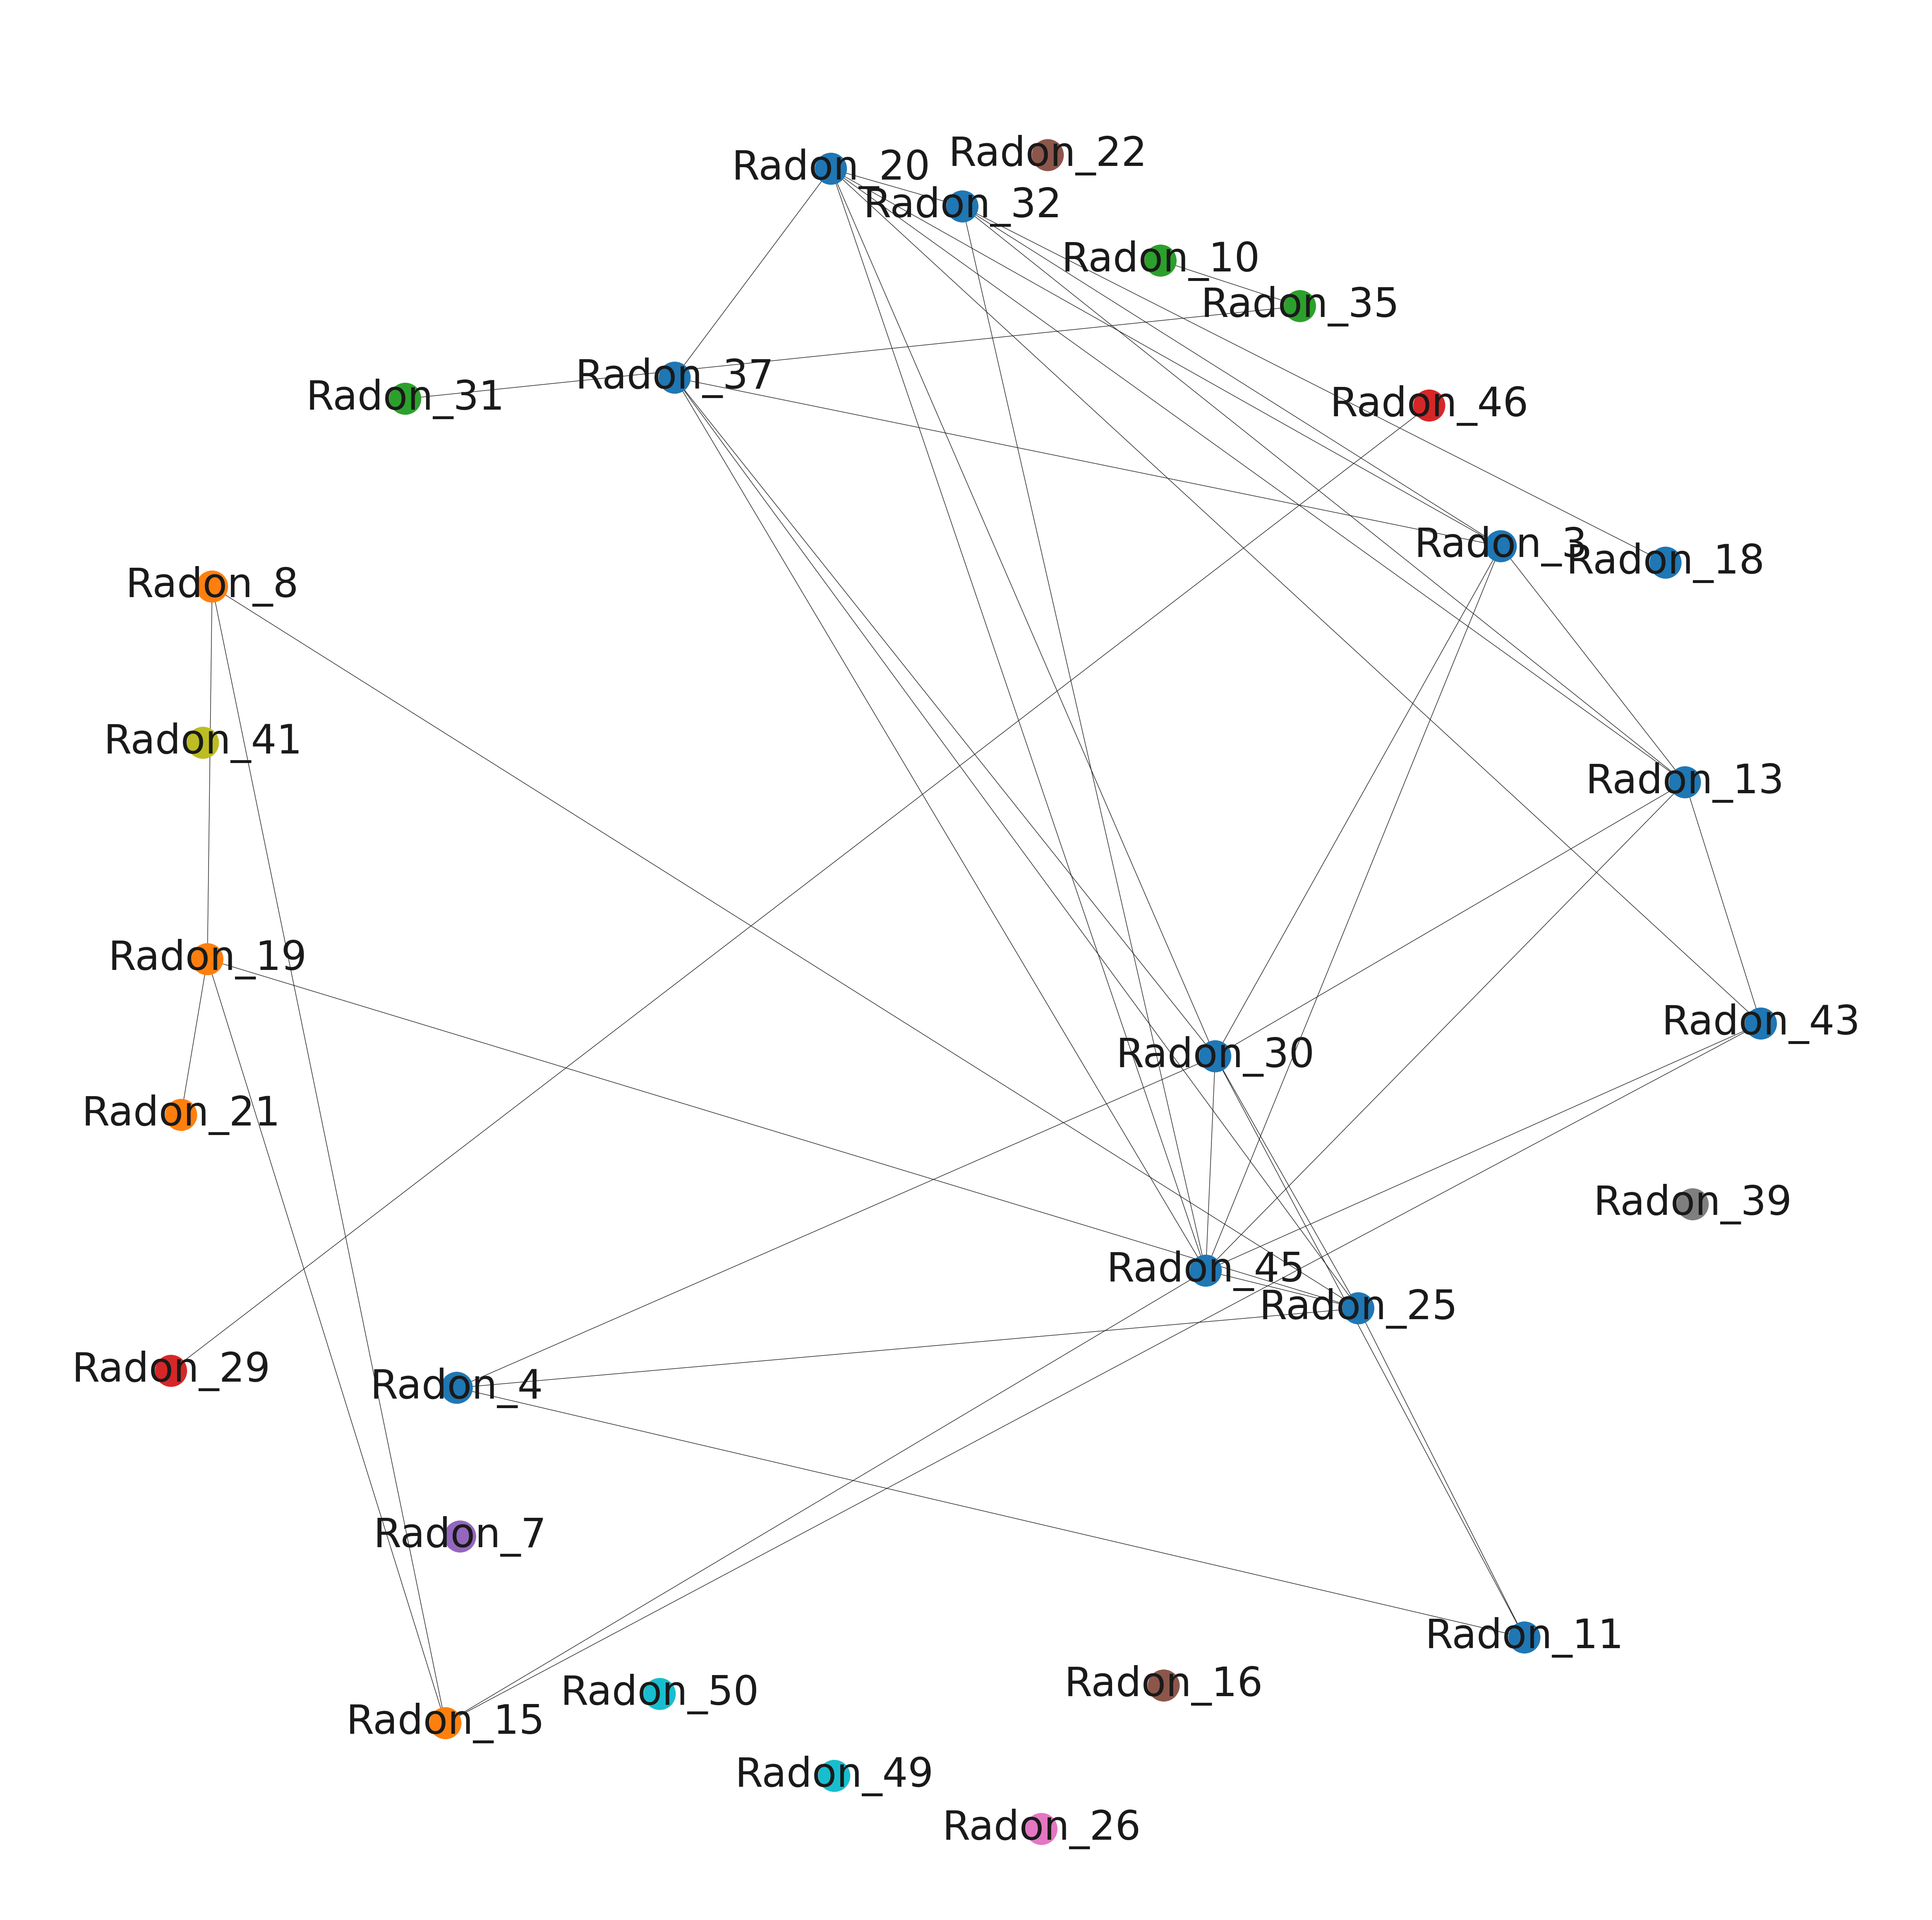

In [18]:
color_map = {}
for i, comm in enumerate(communities_louvain):
    for node in comm:
        color_map[node] = i

#draw the graph
plt.rcParams = plt.rcParamsOrig
fig, ax2 = plt.subplots(1, 1, figsize=(60,60))
ax2.set_facecolor('white')
pos = nx.spring_layout(g6, k=2)
nx.draw_networkx_nodes(g6, pos, node_color=[color_map[node] for node in g6.nodes()], cmap='tab10', ax=ax2, node_size=3000,)
nx.draw_networkx_edges(g6, pos, ax=ax2)
nx.draw_networkx_labels(g6, pos, ax=ax2, font_size=70,)
ax2.axis('off')
fig.savefig('spatial_correlation_louvain', bbox_inches='tight')

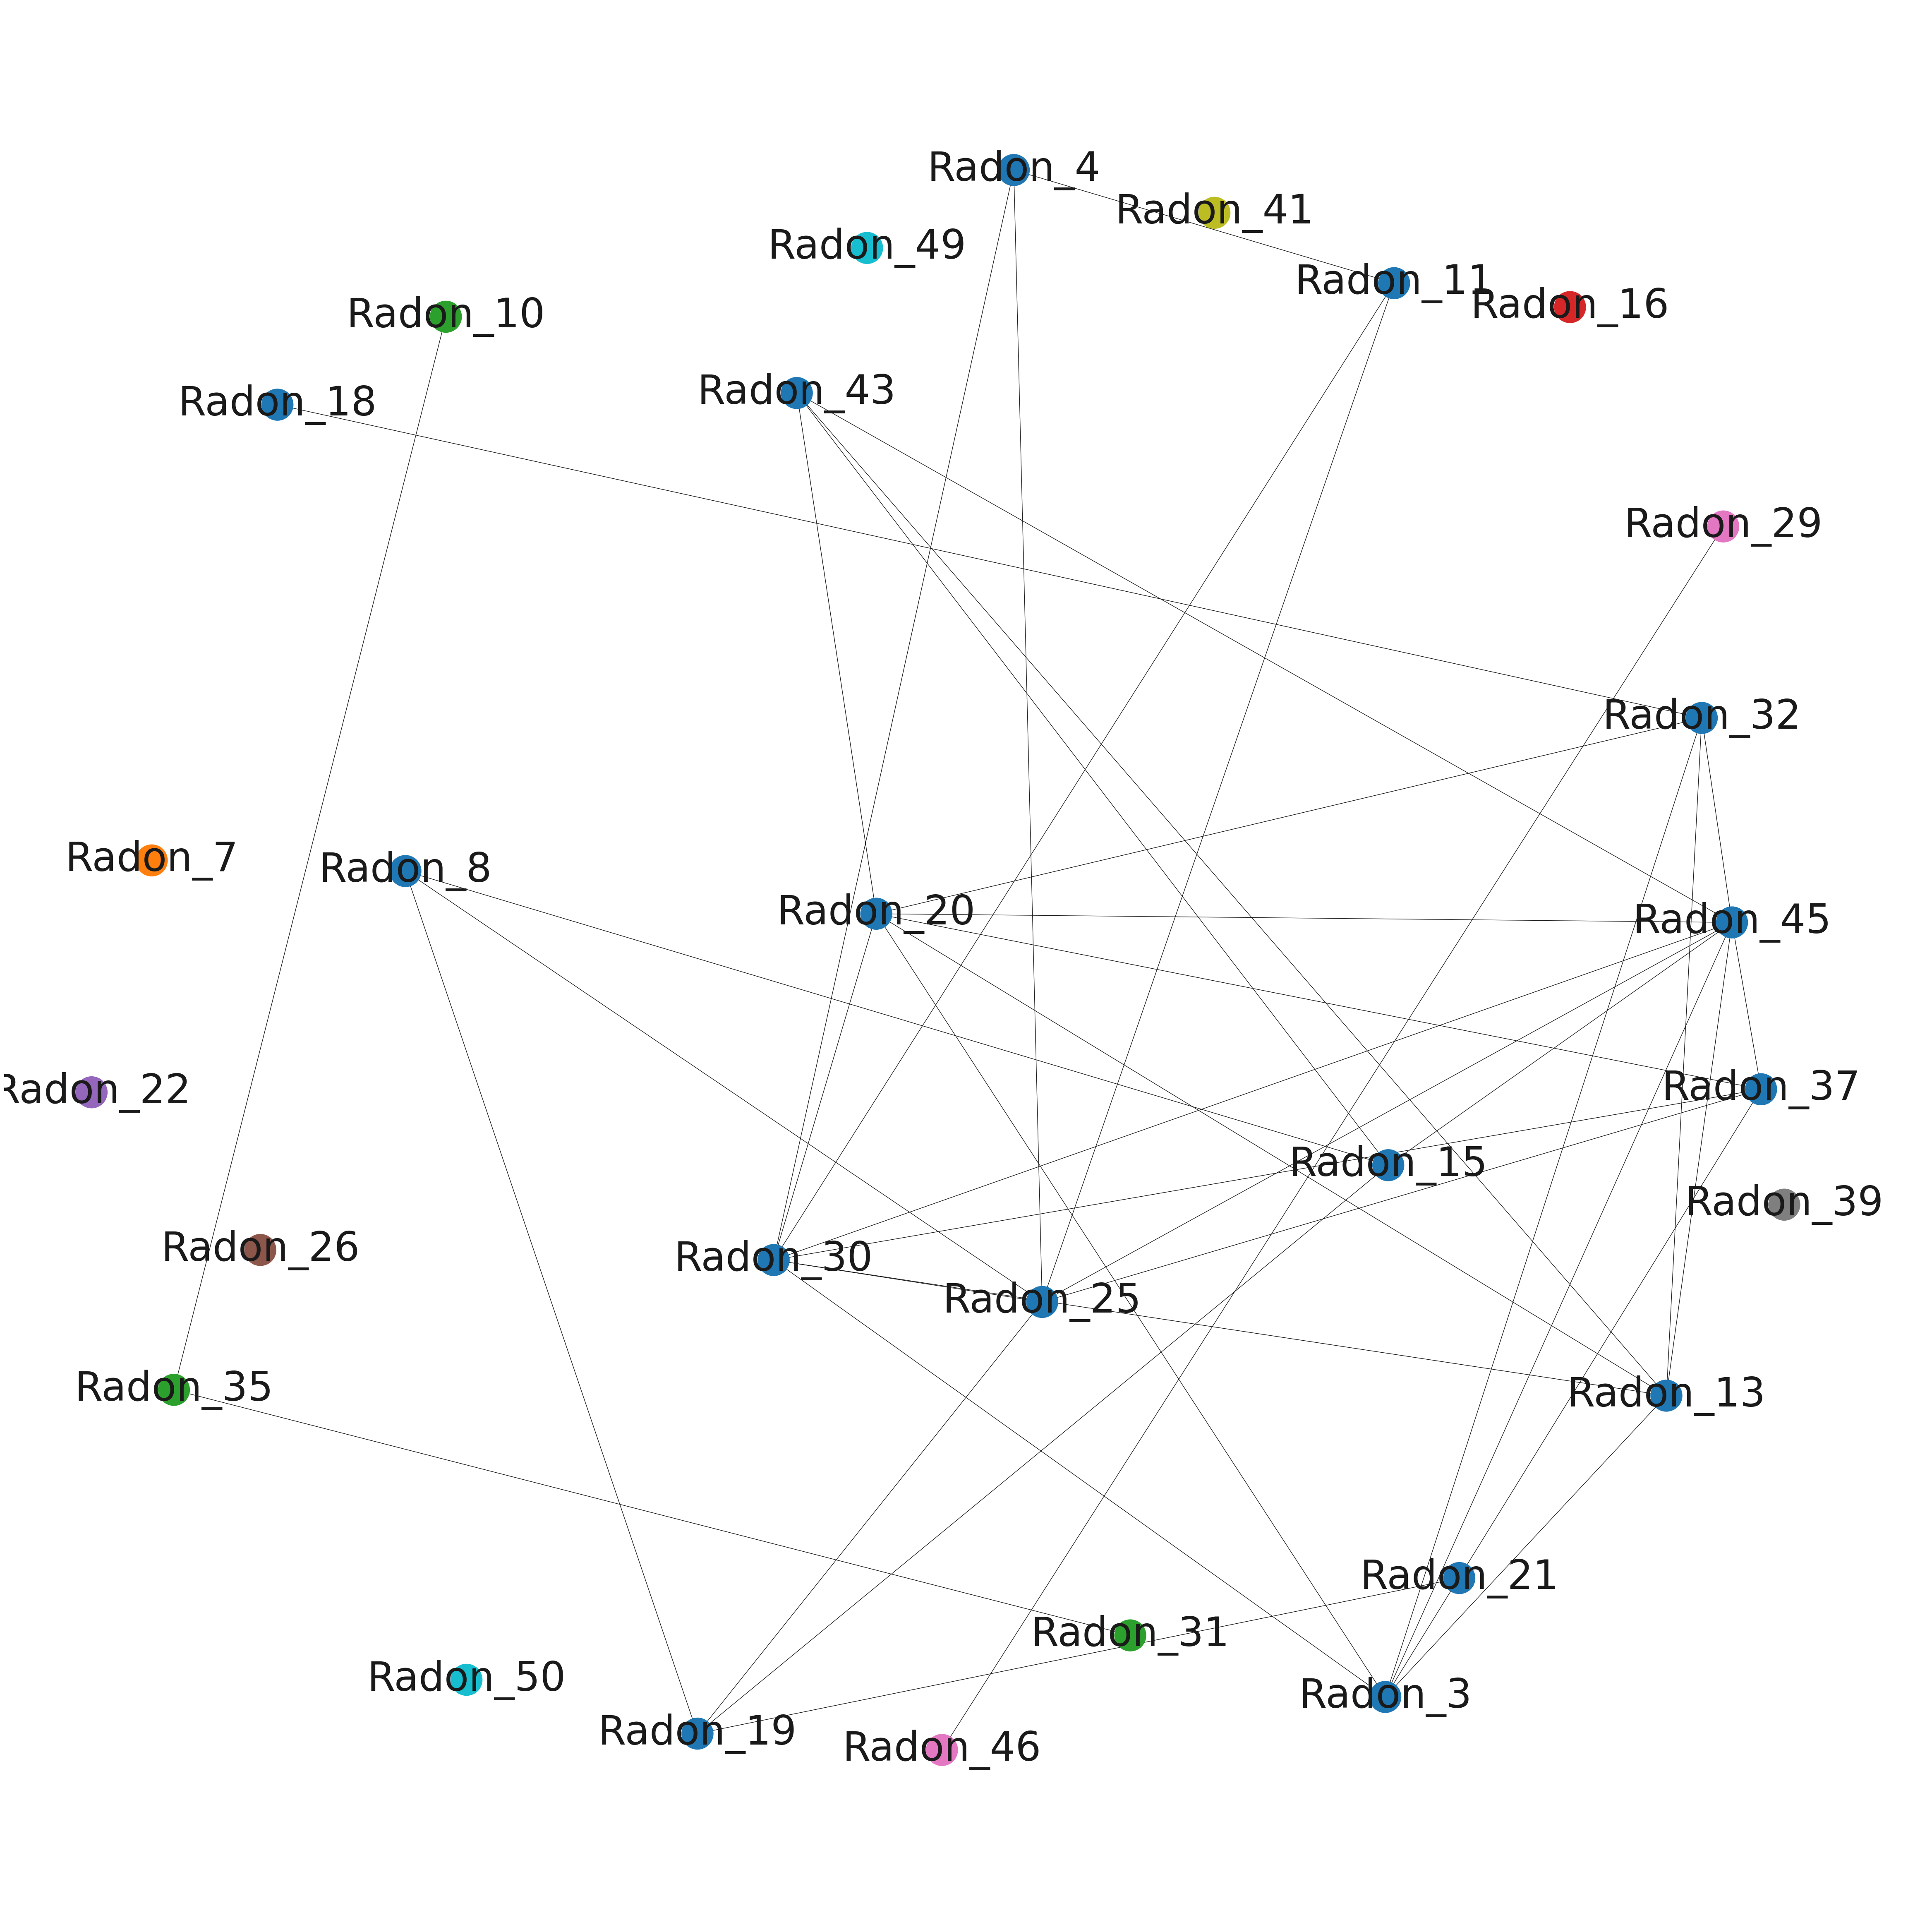

In [19]:
color_map = {}
for i, comm in enumerate(communities_label_propagation):
    for node in comm:
        color_map[node] = i

#draw the graph
plt.rcParams = plt.rcParamsOrig
fig, ax2 = plt.subplots(1, 1, figsize=(60,60))
ax2.set_facecolor('white')
pos = nx.spring_layout(g6, k=2)
nx.draw_networkx_nodes(g6, pos, node_color=[color_map[node] for node in g6.nodes()], cmap='tab10', ax=ax2, node_size=3000,)
nx.draw_networkx_edges(g6, pos, ax=ax2)
nx.draw_networkx_labels(g6, pos, ax=ax2, font_size=70,)
ax2.axis('off')
fig.savefig('spatial_correlation_label_propagation', bbox_inches='tight')